Bastien LE CHENADEC

bastien.le-chenadec@eleves.enpc.fr

# TP 1 - Computational statistics

In [1]:
# Useful imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
%matplotlib inline
np.random.seed(314159) # for reproducibility

## Question 1

On cherche à résoudre le problème :
    $$
        \min_{\theta \in \Theta}J(\theta)
    $$

Dans le cadre du gradient stochastique, on fait les hypothèses suivantes :
* $J$ est convexe et différentiable sur $\Theta_c \subset \Theta$ convexe fermé non vide.
* On a accès à $g$ intégrable telle que :
            $$\nabla J(\theta) = \mathbb{E}(g(\theta, W))$$
            où $W$ est une variable aléatoire latente de loi $P_W$.

L'algorithme du gradient stochastique a pour objectif d'approcher $\theta^*$ solution du problème par la suite $(\theta_n)_{n\in\N}$ définie par :

1. $\theta_0 \in \Theta_c$
2. $\forall n \in \N^*, \quad \theta_{n+1} = \theta_n - \varepsilon_{n+1} g(\theta_n, W_{n+1})$

Dans le cadre de ce TP, l'implémentation est assez directe puisqu'il n'y a pas de contrainte sur $\Theta_c$ et que $g$ est calculée explicitement.

En effet on cherche à minimiser le risque empirique :
$$R_n(w)=\frac{1}{n}\sum_{i=1}^n(y_i-w^Tx_i)^2$$
On peut calculer le gradient de $R_n$ :
$$\nabla R_n(w)=-\frac{2}{n}\sum_{i=1}^n(y_i-w^Tx_i)x_i$$

In [2]:
def empirical_risk(x, y, w):
    return np.mean((y - np.dot(x, w)) ** 2)


def g(x, y, w):
    return -2 * np.mean(x * (y - np.dot(x, w))[:, None], axis=0)


def stochastic_gradient_descent(x, y, w0, learning_rate, nb_iterations, batch=1):
    w = w0
    for i in range(nb_iterations):
        print("Iteration", i, "/", nb_iterations, end="\r")
        idx = np.random.choice(
            np.array(range(len(x)), dtype=int), size=batch, replace=False
        )
        w = w - learning_rate * g(x[idx, :], y[idx], w)
    print()
    return w

## Question 2

In [3]:
# Parameters of the problem
N = 1000
iterations = 10000
learning_rate = 0.01

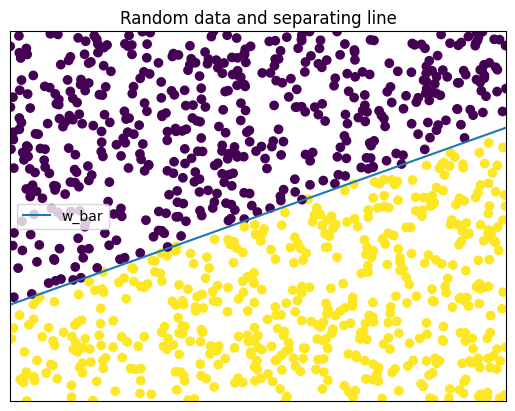

In [4]:
# We restrain ourselves to [-1, 1] x [-1, 1]
x = np.random.uniform(-1, 1, size=(N, 2))

# Generate the direction to separate the points
w_bar = np.random.uniform(-1, 1, size=(2))
w_bar = w_bar / np.linalg.norm(w_bar)

# Compute the corresponding labels
y = np.sign(np.dot(x, w_bar))

# Plot points with their color depending on y
plt.scatter(x[:, 0], x[:, 1], c=y)
# Plot the line w_bar
plt.plot([-1, 1], [w_bar[0] / w_bar[1], -w_bar[0] / w_bar[1]], label="w_bar")
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title("Random data and separating line")
plt.show()

## Question 3

Iteration 9999 / 10000


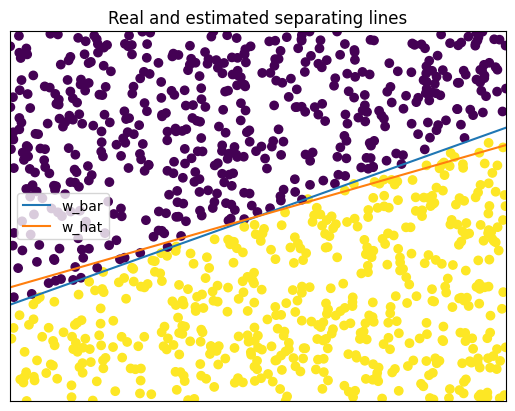

In [5]:
w0 = np.array([1, 1]) / np.sqrt(2)

w_hat = stochastic_gradient_descent(
    x, y, w0, learning_rate, iterations
)
w_hat = w_hat / np.linalg.norm(w_hat)

# Plot
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.plot([-1, 1], [w_bar[0] / w_bar[1], -w_bar[0] / w_bar[1]], label="w_bar")
plt.plot([-1, 1], [w_hat[0] / w_hat[1], -w_hat[0] / w_hat[1]], label="w_hat")
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title("Real and estimated separating lines")
plt.show()

Le vecteur estimé $\hat{w}$ n'est pas très éloigné du vecteur réel $\bar{w}$, mais il n'est pas parfait. Regardons les valeurs du risque empirique :

In [6]:
print("Empirical risk w_hat :", empirical_risk(x, y, w_hat))
print("Empirical risk w_bar :", empirical_risk(x, y, w_bar))

Empirical risk w_hat : 0.33966796583658676
Empirical risk w_bar : 0.3458867102917914


Le risque empirique de $\hat{w}$ est plus faible que le risque empirique de $\bar{w}$, ce qui explique pourquoi $\hat{w}$ est significativement différent de $\bar{w}$ (puisque l'algorithme de descente de gradient minimise le risque empirique). Cependant, nous avons généré les données avec $\bar{w}$, donc $\bar{w}$ minimise clairement le risque réel. La différence provient du fait que le risque empirique est une approximation du risque réel dans laquelle nous avons remplacé une perte de classification 0-1 par une perte quadratique. Cependant, le risque réel n'est pas différentiable, donc nous ne pouvons pas utiliser la descente de gradient pour le minimiser.

## Question 4

Iteration 9999 / 10000


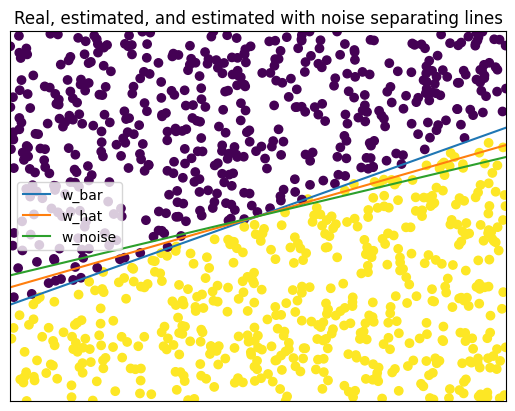

In [7]:
noise = np.random.normal(0, 0.1, x.shape)
w_noise = stochastic_gradient_descent(
    x + noise,
    y,
    w0,
    learning_rate,
    iterations
)
w_noise = w_noise / np.linalg.norm(w_noise)

# Plot
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.plot([-1, 1], [w_bar[0] / w_bar[1], -w_bar[0] / w_bar[1]], label="w_bar")
plt.plot([-1, 1], [w_hat[0] / w_hat[1], -w_hat[0] / w_hat[1]], label="w_hat")
plt.plot(
    [-1, 1], [w_noise[0] / w_noise[1], -w_noise[0] / w_noise[1]], label="w_noise"
)
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title("Real, estimated, and estimated with noise separating lines")
plt.show()

Le bruit augmente l'erreur réelle par rapport à aux données sans bruit. Le vecteur estimé $\hat{w}'$ est plus éloigné du vecteur réel $\bar{w}$ que l'original $\hat{w}$, mais le risque empirique de $\hat{w}'$ est toujours plus faible que le risque empirique de $\bar{w}$ :

In [8]:
print("Empirical risk w_noise :", empirical_risk(x, y, w_noise))
print("Empirical risk w_bar :", empirical_risk(x, y, w_bar))

Empirical risk w_noise : 0.33896111322673844
Empirical risk w_bar : 0.3458867102917914


Cela semble logique car le bruit va flouter la frontière entre les deux classes, et l'algorithme de descente de gradient va essayer de minimiser le risque empirique, ce qui conduira à un vecteur $\hat{w}'$ qui n'est pas très bon pour classer les données. En effet, si nous visualisons les données avec le bruit additif, nous pouvons constater que la frontière n'est pas très nette :

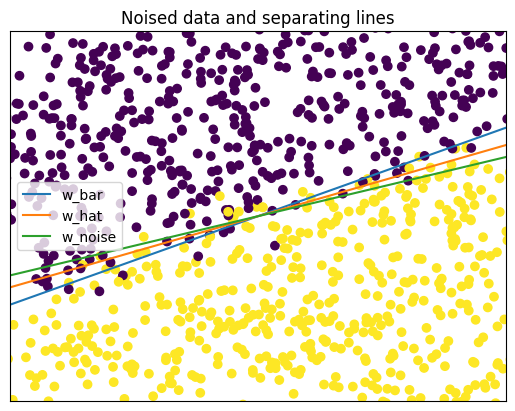

In [9]:
plt.scatter((x + noise)[:, 0], (x + noise)[:, 1], c=y)
plt.plot([-1, 1], [w_bar[0] / w_bar[1], -w_bar[0] / w_bar[1]], label="w_bar")
plt.plot([-1, 1], [w_hat[0] / w_hat[1], -w_hat[0] / w_hat[1]], label="w_hat")
plt.plot(
    [-1, 1], [w_noise[0] / w_noise[1], -w_noise[0] / w_noise[1]], label="w_noise"
)
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title("Noised data and separating lines")
plt.show()

## Question 5

In [10]:
np.random.seed(31415) # for reproducibility
# Load data
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

x = breast_cancer_wisconsin_diagnostic.data.features.to_numpy()
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

y = breast_cancer_wisconsin_diagnostic.data.targets.to_numpy()
y = np.where(y == "M", 1, -1).reshape((len(y)))

In [11]:
w0 = np.zeros(x.shape[1])

w_hat = stochastic_gradient_descent(
    x, y, w0, learning_rate, iterations
)
w_hat = w_hat / np.linalg.norm(w_hat)

print("Empirical risk :", empirical_risk(x, y, w_hat))

Iteration 9999 / 10000
Empirical risk : 0.3270742294264383


Ce risque empirique est-il bon ? En fait, nous n’en avons aucune idée. Une meilleure façon d'évaluer les performances de ce classificateur est de mesurer sa précision :

In [12]:
print("Accuracy :", np.mean(np.sign(np.dot(x, w_hat)) == y))

Accuracy : 0.9437609841827768


Une précision de 94% semble relativement satisfaisante pour un algorithme aussi simple. Pour en être sûr regardons la précision classe par classe :

In [13]:
class_1 = np.where(y == 1)
print("Accuracy class 1 :", np.mean(np.sign(np.dot(x[class_1], w_hat)) == 1))
class_2 = np.where(y == -1)
print("Accuracy class 2 :", np.mean(np.sign(np.dot(x[class_2], w_hat)) == -1))

Accuracy class 1 : 0.9811320754716981
Accuracy class 2 : 0.9215686274509803


On a aussi une précision classe par classe acceptable, ce qui est rassurant (si les classes sont déséquilibrées, une bonne précision globale peut cacher une mauvaise précision classe par classe).

Évidemment, on s'est contenté de mesurer la précision sur les données d'entraînement. Pour avoir une idée de la capacité de généralisation de notre classifieur, il faudrait mesurer sa précision sur des données de test.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

w_hat = stochastic_gradient_descent(
    x_train, y_train, w0, learning_rate, iterations
)
w_hat = w_hat / np.linalg.norm(w_hat)

print("Test accuracy :", np.mean(np.sign(np.dot(x_test, w_hat)) == y_test))
class_1 = np.where(y_test == 1)
print("Accuracy class 1 :", np.mean(np.sign(np.dot(x_test[class_1], w_hat)) == 1))
class_2 = np.where(y_test == -1)
print("Accuracy class 2 :", np.mean(np.sign(np.dot(x_test[class_2], w_hat)) == -1))

Iteration 9999 / 10000
Test accuracy : 0.8157894736842105
Accuracy class 1 : 0.8
Accuracy class 2 : 0.8243243243243243


Notre modèle est tout de suite beaucoup moins performant (n'oublions pas qu'un classifieur aléatoire obtient une précision de 0.5 sur une classification 0-1 !). Il ne généralise pas très bien sur des données qu'il n'a pas vues pendant l'entraînement. Cela s'explique par plusieurs raisons :
* Le modèle est trop simple pour classifier des données complexes : c'est un simple hyperplan, alors que les données réelles n'ont aucune raison d'être linéairement séparables.
* Le modèle est peut-être sur-entraîné : on n'a pas utilisé de régularisation et on a minimisé le risque empirique, donc le modèle a pu apprendre des caractéristiques spécifiques aux données d'entraînement qui ne se retrouvent pas dans les données de test.

Si on utilise un modèle avec une meilleure capacité de généralisation, on obtient de meilleurs résultats :

In [15]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
print("Test accuracy :", model.score(x_test, y_test))
class_1 = np.where(y_test == 1)
print("Accuracy class 1 :", np.mean(model.predict(x_test[class_1]) == 1))
class_2 = np.where(y_test == -1)
print("Accuracy class 1 :", np.mean(model.predict(x_test[class_2]) == -1))

Test accuracy : 0.9649122807017544
Accuracy class 1 : 0.925
Accuracy class 1 : 0.9864864864864865
